<a href="https://colab.research.google.com/github/aravindh698/TCSION-INTERNSHIP/blob/main/tcsion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HYPOTHESIS GENERATION:
1. From Train DataSet it is seen that

*   The sales is Higher at 7th month
*   Second store shows maximal sale
*   The year 2017 shows a maximal sale at store 2
*   items 13,15,28,22,38,45 are soled maximally
*   Sale is higher at weekends











We need to import the needed packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


We now load the data sets into two different dataframes

In [2]:
df1=pd.read_csv('/content/train.csv')
df2=pd.read_csv('/content/test.csv')

**Data Cleaning**

Cleaning means to

1.  removing the unwanted noisy data,
2.  removing NAN value

1.   dropping unwanted columns
2.   Checking the datatype and converting it to proper format





Now need to check for missing values in df1

In [3]:
df1.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

Now need to check for missing values in df2

In [4]:
df2.isnull().sum()

id       0
date     0
store    0
item     0
dtype: int64

Now we check the datatype of Dataframe df1

In [5]:
df1.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

Now we check the datatype of Dataframe df2

In [6]:
df2.dtypes

id        int64
date     object
store     int64
item      int64
dtype: object

We now create a copy of original data to avoid changes we make while making featrure extraction and predictions

In [7]:
train_original=df1.copy()
test_original=df2.copy()

In [8]:
df1.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [9]:
df2.columns

Index(['id', 'date', 'store', 'item'], dtype='object')

Now we check the shape of the Dataframe to be trained 

In [10]:
df1.shape

(913000, 4)

Now we check the shape of the Dataframe to be tested

In [11]:
df2.shape

(45000, 4)

From datatype we found that date is in object type which is to be converted to datetime format 

In [12]:
df1['date']= pd.to_datetime(df1.date,format='%Y-%m-%d')
df2['date']= pd.to_datetime(df2.date,format='%Y-%m-%d')
train_original['date']= pd.to_datetime(train_original.date,format='%Y-%m-%d')
test_original['date']= pd.to_datetime(test_original.date,format='%Y-%m-%d')

In [13]:
for i in (df1,df2,train_original,test_original):
  i['year']=i.date.dt.year
  i['month']=i.date.dt.month
  i['day']=i.date.dt.dayofweek

In [14]:
df1.head(14)

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5
5,2013-01-06,1,1,12,2013,1,6
6,2013-01-07,1,1,10,2013,1,0
7,2013-01-08,1,1,9,2013,1,1
8,2013-01-09,1,1,12,2013,1,2
9,2013-01-10,1,1,9,2013,1,3


In [15]:
df1.tail()

,date,store,item,sales,year,month,day
912995,2017-12-27,10,50,63,2017,12,2
912996,2017-12-28,10,50,59,2017,12,3
912997,2017-12-29,10,50,74,2017,12,4
912998,2017-12-30,10,50,62,2017,12,5
912999,2017-12-31,10,50,82,2017,12,6


In [16]:
df1 = df1.set_index('date')
df1.head()

,store,item,sales,year,month,day
date,,,,,,
2013-01-01,1,1,13,2013,1,1
2013-01-02,1,1,11,2013,1,2
2013-01-03,1,1,14,2013,1,3
2013-01-04,1,1,13,2013,1,4
2013-01-05,1,1,10,2013,1,5


In [17]:
df2.head()

,id,date,store,item,year,month,day
0,0,2018-01-01,1,1,2018,1,0
1,1,2018-01-02,1,1,2018,1,1
2,2,2018-01-03,1,1,2018,1,2
3,3,2018-01-04,1,1,2018,1,3
4,4,2018-01-05,1,1,2018,1,4


Now we try to analyse the hypothesis generated 
first we try to plot sales in a year

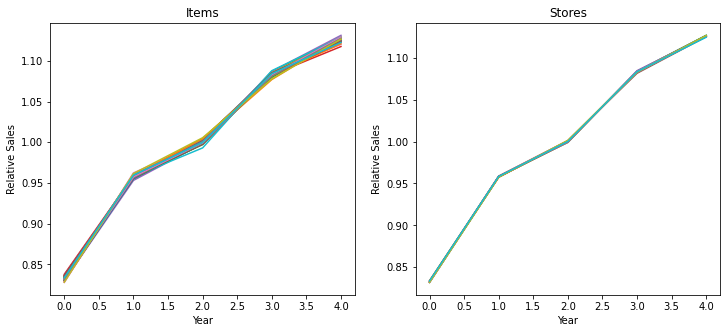

In [18]:
agg_year_item = pd.pivot_table(df1, index='year', columns='item',
                               values='sales', aggfunc=np.mean).values
agg_year_store = pd.pivot_table(df1, index='year', columns='store',
                                values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_year_item / agg_year_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Year")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_year_store / agg_year_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Year")
plt.ylabel("Relative Sales")
plt.show()

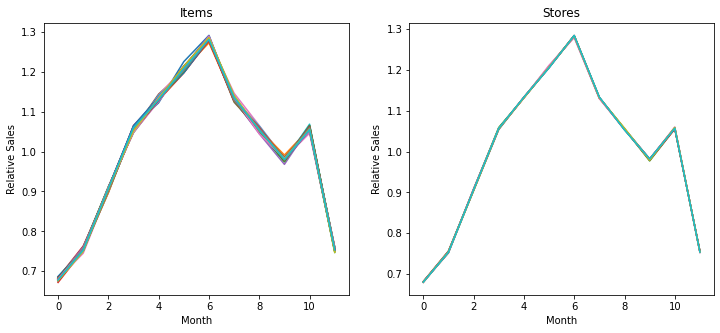

In [19]:
agg_month_item = pd.pivot_table(df1, index='month', columns='item',
                               values='sales', aggfunc=np.mean).values
agg_month_store = pd.pivot_table(df1, index='month', columns='store',
                                values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_month_item / agg_month_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Month")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_month_store / agg_month_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Month")
plt.ylabel("Relative Sales")
plt.show()

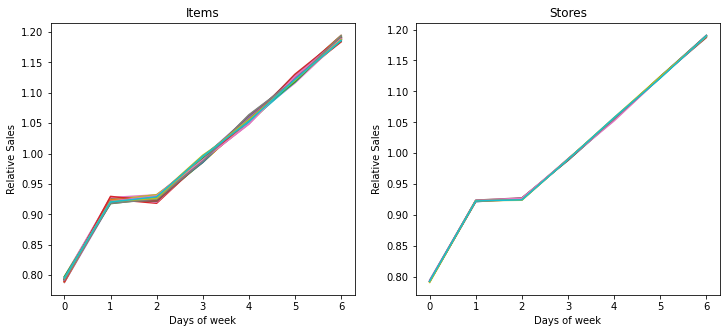

In [20]:
agg_weekly_item = pd.pivot_table(df1, index='day', columns='item',
                               values='sales', aggfunc=np.mean).values
agg_weekly_store = pd.pivot_table(df1, index='day', columns='store',
                                values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_weekly_item / agg_weekly_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Days of week")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_weekly_store / agg_weekly_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Days of week")
plt.ylabel("Relative Sales")
plt.show()

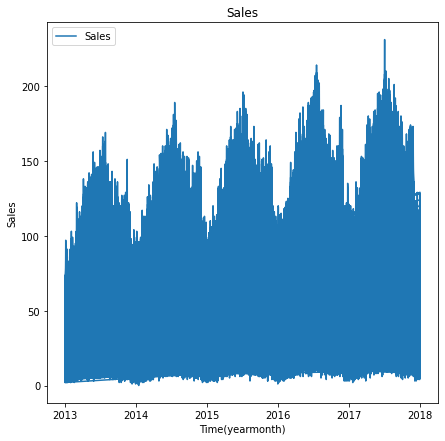

In [21]:

ts=df1['sales']
plt.figure(figsize=(7,7))
plt.plot(ts,label='Sales')
plt.title('Sales')
plt.xlabel('Time(yearmonth)')
plt.ylabel('Sales')
plt.legend(loc='best')


To make visualation and to analyse still effectively we use bar chart here on years and sales

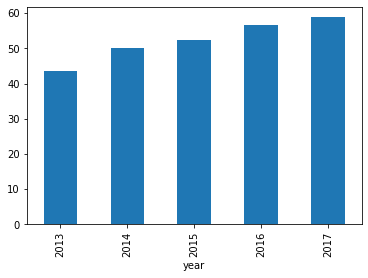

In [22]:
df1.groupby('year')['sales'].mean().plot.bar()

Now the next Hypothesis is verified

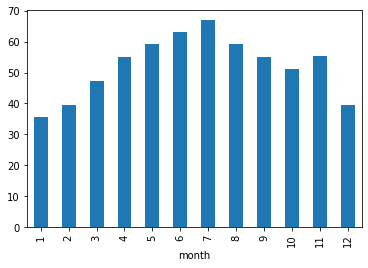

In [23]:
df1.groupby('month')['sales'].mean().plot.bar()

Now we plot a graph to analyse the month and year
we can observe a cyclic pattern 

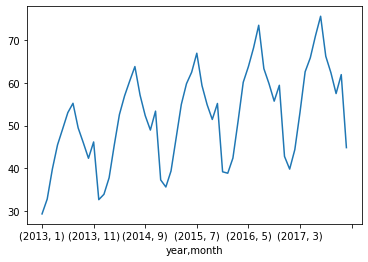

In [24]:
temp=df1.groupby(['year','month'])['sales'].mean()
temp.plot()

Next Hypothesis is observed

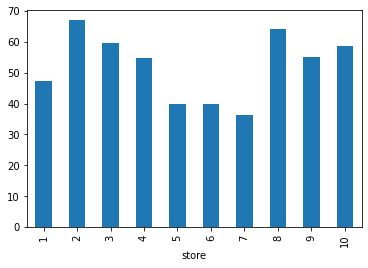

In [25]:
df1.groupby('store')['sales'].mean().plot.bar()

Next Hypothesis is verified

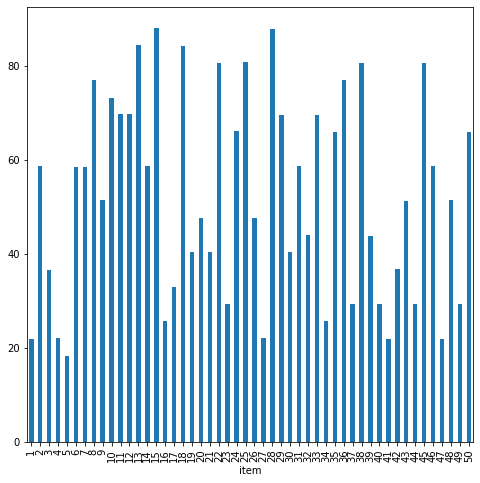

In [26]:
df1.groupby('item')['sales'].mean().plot.bar(figsize=(8,8))

Next Hypothesis is  Verified

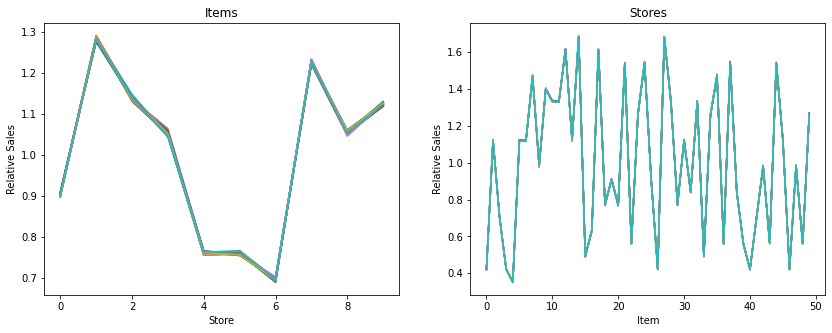

In [27]:


agg_store_item = pd.pivot_table(df1, index='store', columns='item',
                                values='sales', aggfunc=np.mean).values

plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(agg_store_item / agg_store_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Store")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_store_item.T / agg_store_item.T.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Item")
plt.ylabel("Relative Sales")
plt.show()

We now produce a lineplot for sales

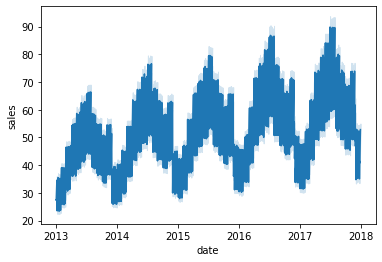

In [28]:
import seaborn as sns
sns.lineplot(x="date",y="sales",legend="full",data=df1)

We check for next Hypothesis

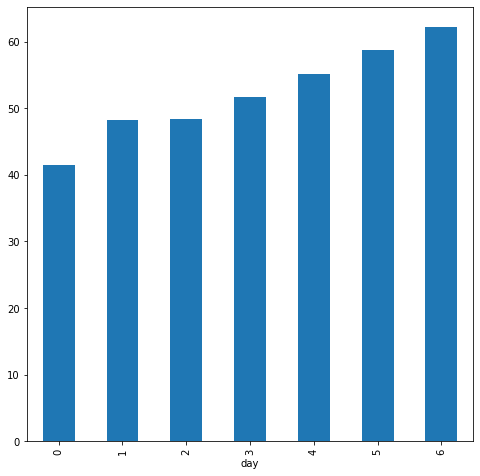

In [29]:
df1.groupby('day')['sales'].mean().plot.bar(figsize=(8,8))

We now produce a residual plot for sales 

<Figure size 432x288 with 0 Axes>

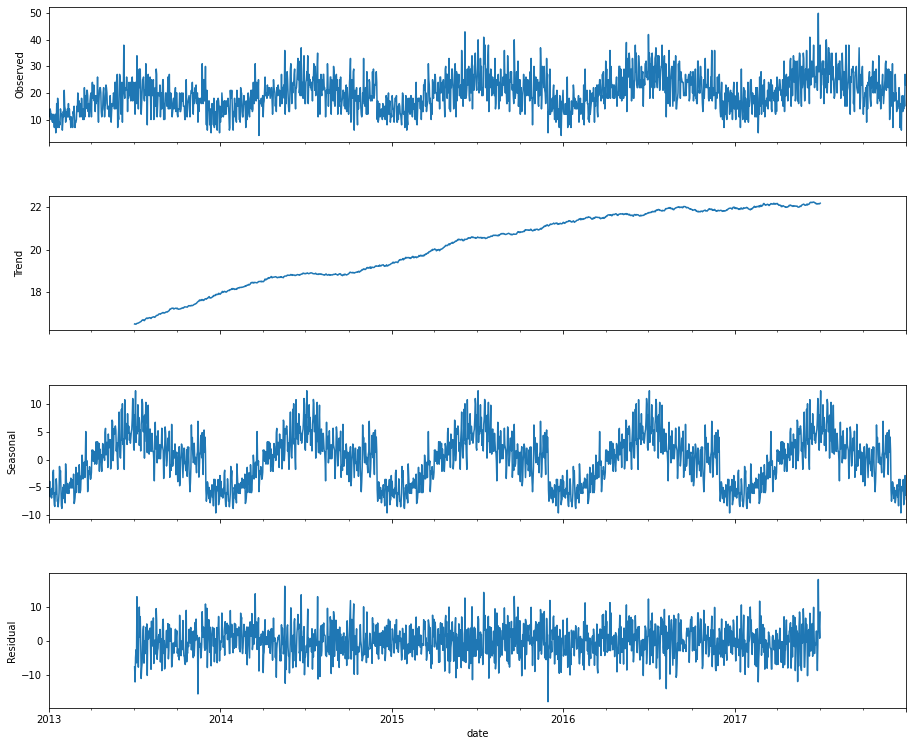

In [30]:
train_item1 = df1[df1['item']==1]
train_final = train_item1[train_item1['store']==1]

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_final['sales'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(14, 12)

From the Above Graphs ploted its obvious to see the seasonality and trend patterns. But we need to remove them as we need to find any other patterns that help us predict in better way 

Now Statistically we can check the dataset to say whether it is  a staionary or not using 2 ways,
1.   Augmented Dickey-Fuller test 
2.   Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test 

I have used KPSS to check stationary or not

In [31]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
stats,p,lags,critical_values = kpss(df1['sales'],'c')
print(f'Test_Staticstics: {stats} ')
print(f'p-value: {p} ')
print(f'Crirtical-value: {critical_values} ')
if p < 0.05:
  print('Not Sationary')
else:
  print('Stationary')  
        

Test_Staticstics: 15.285021355158516 
p-value: 0.01 
Crirtical-value: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739} 
Not Sationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Its clear from KPSS test that the model is not Stationary

Now we shall check with adf test

In [32]:
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic

def dickey_fuller_test(timeseries, window = 12, cutoff = 0.01):
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)
    
dickey_fuller_test(train_final['sales'])  

p-value = 0.0361. The series is likely non-stationary.
Test Statistic                   -2.987278
p-value                           0.036100
#Lags Used                       20.000000
Number of Observations Used    1805.000000
Critical Value (1%)              -3.433978
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567623
dtype: float64


Its Clear again from adf that model is not staionary

We now produce a rolling mean and standard deviation

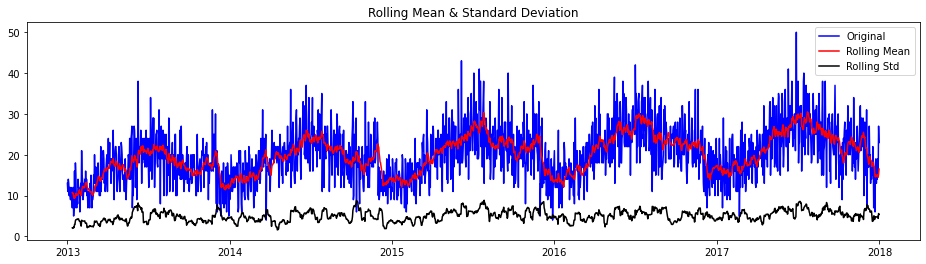

In [33]:
def roll_stats(timeseries, window = 12, cutoff = 0.01):
    
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(16, 4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
   # plt.rcParams['agg.path.chunksize'] = 50000
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
roll_stats(train_final['sales'])    

Now we came to know that the dataset and the attribute is not sationary so we need to change it to stationary one,
A stationary pattern is a one with,


1.   mean = 0
2.   varience = constant
1.   no seasonality






Now we see a technique of applying to convert a model from non stationary to stationary one using 

1.   **difference(t) = observation(t) - observation(t-1)**




date
2013-01-02   -2.0
2013-01-03    3.0
2013-01-04   -1.0
2013-01-05   -3.0
2013-01-06    2.0
Name: sales, dtype: float64


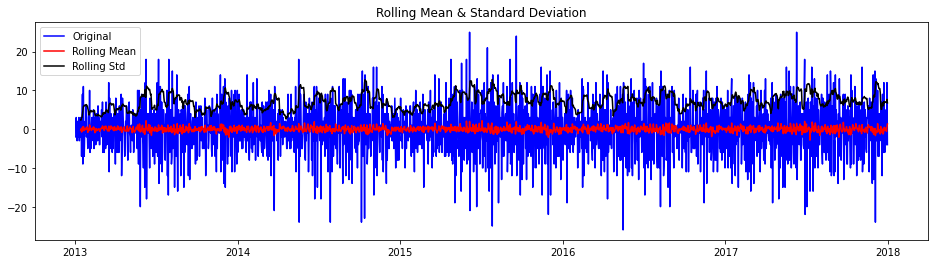

p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.520810e+01
p-value                        5.705031e-28
#Lags Used                     2.000000e+01
Number of Observations Used    1.804000e+03
Critical Value (1%)           -3.433980e+00
Critical Value (5%)           -2.863143e+00
Critical Value (10%)          -2.567624e+00
dtype: float64


In [34]:

first_diff = train_final.sales - train_final.sales.shift(1)
first_diff = first_diff.dropna(inplace = False)
print(first_diff.head())
roll_stats(first_diff,window = 12, cutoff = 0.01)
dickey_fuller_test(first_diff, window = 12)

**Auto Correlation**
It is common to use the autocorrelation (ACF) plot, also known as self-autocorrelation, to visualize the autocorrelation of a time-series. The plot_acf() function in the statsmodels library can be used to measure and plot the autocorrelation of a time series.

**Partial Correlation**
the partial autocorrelation function (PACF) measures the correlation coefficient between a time-series and lagged versions of itself. 

They are used to check a model is Moving Average  or AutoRegressive  model

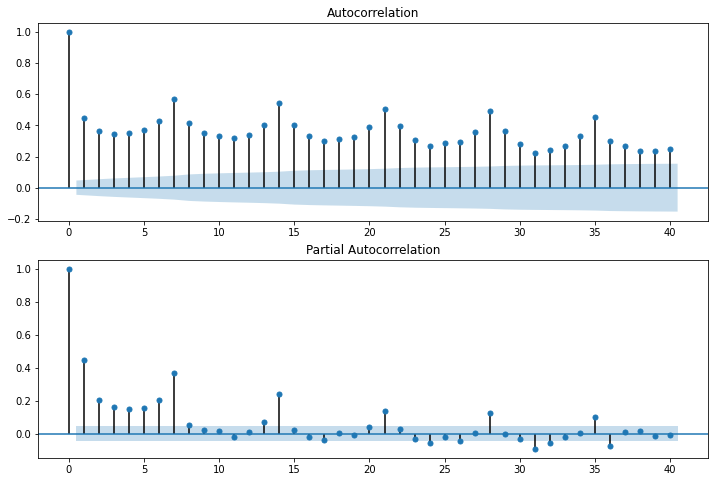

In [35]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_final.sales, lags=40, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_final.sales, lags=40, ax=ax2)

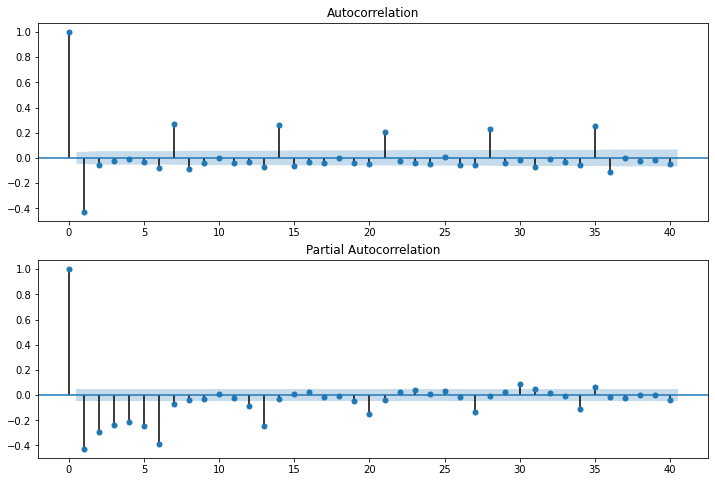

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2)

In [37]:
Train=train_final.loc['2013-01-01':'2016-12-31']
Valid=train_final.loc['2017-01-01':'2017-12-31']

In [38]:
train_final.head()

,store,item,sales,year,month,day
date,,,,,,
2013-01-01,1,1,13,2013,1,1
2013-01-02,1,1,11,2013,1,2
2013-01-03,1,1,14,2013,1,3
2013-01-04,1,1,13,2013,1,4
2013-01-05,1,1,10,2013,1,5


In [39]:
Train=Train - Train.shift(1)
Valid =Valid-Valid.shift(1)

In [40]:
Train.fillna(0,inplace=True)
Valid.fillna(0,inplace=True)
Train['sales'].fillna(Train['sales'].mean())

date
2013-01-01     0.0
2013-01-02    -2.0
2013-01-03     3.0
2013-01-04    -1.0
2013-01-05    -3.0
              ... 
2016-12-27    -6.0
2016-12-28     6.0
2016-12-29     5.0
2016-12-30     3.0
2016-12-31   -10.0
Name: sales, Length: 1461, dtype: float64

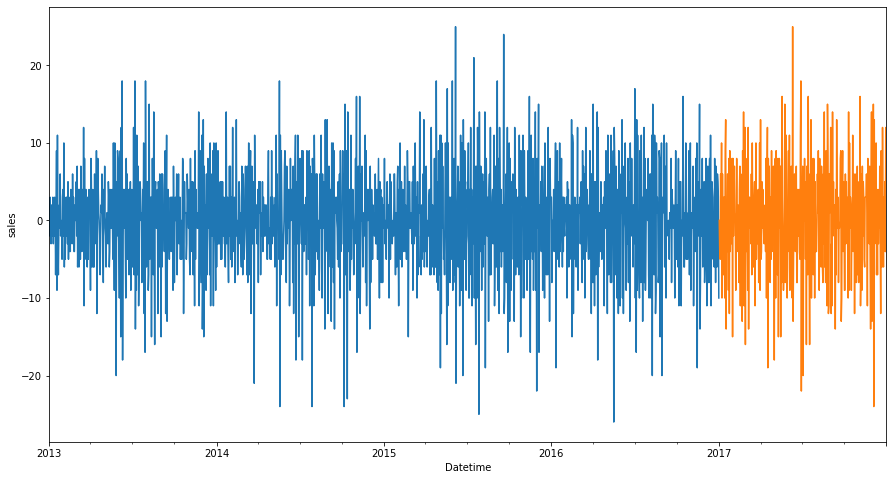

In [41]:
Train.sales.plot(figsize=(15,8))
Valid.sales.plot(figsize=(15,8))
plt.xlabel('Datetime')
plt.ylabel('sales')
plt.show()

Methods of Forecasting


1.   Naive Method of Forecasting
2.   Exponential Smoothing
1.   Moving Average
1.   Holt
2.   ARIMA
1.   SARIMA








Naive Method of Forecasting


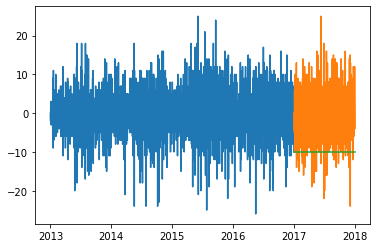

In [42]:

dd= np.asarray(Train.sales)
y_hat=Valid.copy()
y_hat['navie']= dd[len(dd)-1]
plt.plot(Train.index,Train['sales'])
plt.plot(Valid.index,Valid['sales'])
plt.plot(y_hat.index,y_hat['navie'])
plt.show()

Evaluation Metrics for Naive Method

In [43]:
from sklearn.metrics import mean_squared_error
rms1=mean_squared_error(Valid.sales,y_hat.navie)
print(rms1)

159.70958904109588


Moving Average Method of Forecasting at rolling mean 10

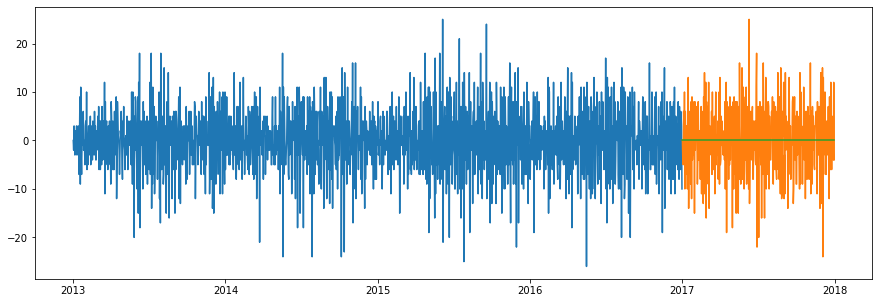

In [44]:
y_hat_avg = Valid.copy()
y_hat_avg['moving_avg_forecast']=Train['sales'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['sales'],label='Train')
plt.plot(Valid['sales'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving')
plt.show()


Moving Average Method of Forecasting using rollling mean 20

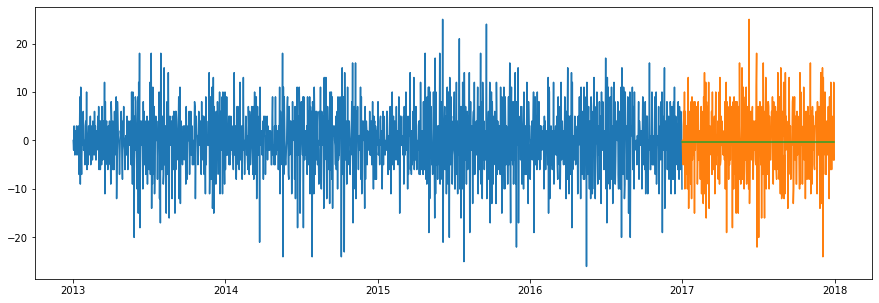

In [45]:
y_hat_avg['moving_avg_forecast']=Train['sales'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['sales'],label='Train')
plt.plot(Valid['sales'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving')
plt.show()

Moving Average of forecasting using rolling mean 50

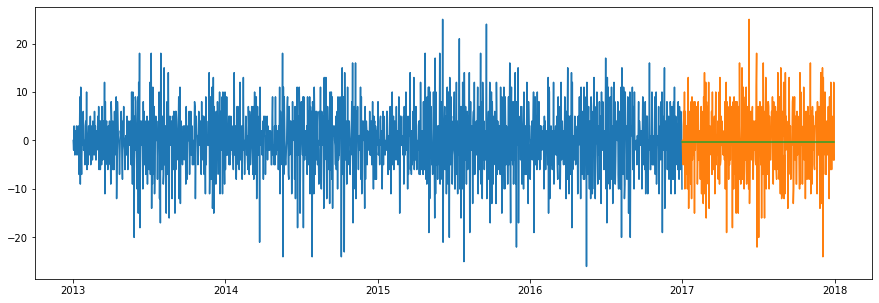

In [46]:
y_hat_avg['moving_avg_forecast']=Train['sales'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['sales'],label='Train')
plt.plot(Valid['sales'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving')
plt.show()

Evaluation metrics for Moving Average

In [47]:
from sklearn.metrics import mean_squared_error
rms2=mean_squared_error(Valid.sales,y_hat_avg.moving_avg_forecast)
print(rms2)

59.55327123287672


Exponential Smoothing method of Forecasting

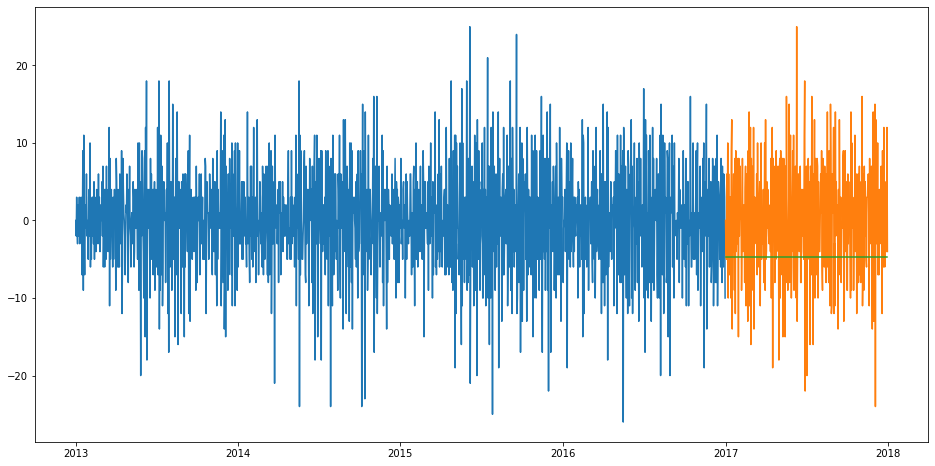

In [48]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
y_hat_avg=Valid.copy()
fit2=SimpleExpSmoothing(np.asarray(Train['sales'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES']=fit2.forecast(len(Valid))
plt.figure(figsize=(16,8))
plt.plot(Train['sales'],label='Train')
plt.plot(Valid['sales'],label='Valid')
plt.plot(y_hat_avg['SES'],label='Moving')
plt.show()

Evaluation metrics for Exponential Smoothing

In [49]:
from sklearn.metrics import mean_squared_error
rms3=mean_squared_error(Valid.sales,y_hat_avg.SES)
print(rms3)

81.45532305751964


Holt Method of Forecasting 

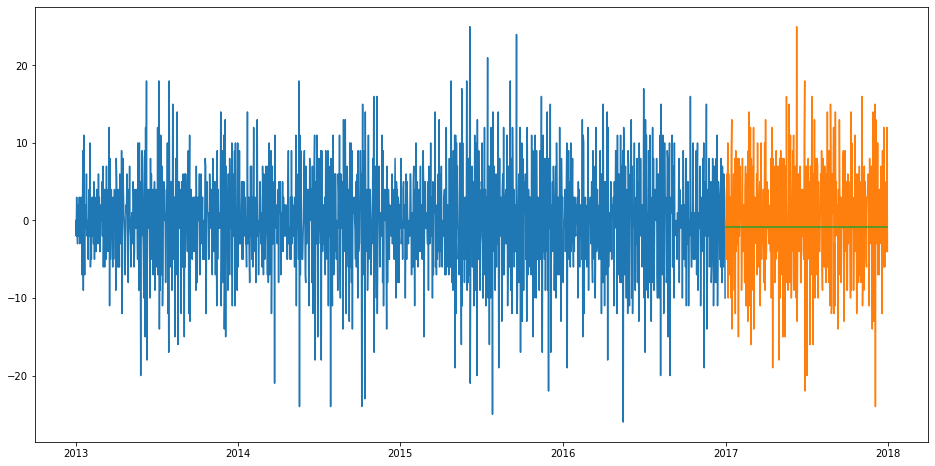

In [50]:
y_hat_avg=Valid.copy()
fit2=Holt(np.asarray(Train['sales'])).fit(smoothing_level=0.2)
y_hat_avg['Hot_linear']=fit2.forecast(len(Valid))
plt.figure(figsize=(16,8))
plt.plot(Train['sales'],label='Train')
plt.plot(Valid['sales'],label='Valid')
plt.plot(y_hat_avg['Hot_linear'],label='Moving')
plt.show()

Evaluation metrics of Holt

In [51]:
from sklearn.metrics import mean_squared_error
rms4=mean_squared_error(Valid.sales,y_hat_avg.Hot_linear)
print(rms4)

60.226073384810256


**ARIMA MODEL FOR PREDICTION OF SALES**

ARIMA = AR + I + MA (AutoRegressive + Integerated + MovingAverage)



**AR: Autoregression**. A model that uses the dependent relationship between an observation and some number of lagged observations.

**I: Integrated.** The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

**MA: Moving Average**. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.



We now use ARIMA in python and interrupt the results

In [52]:
arima_model = sm.tsa.ARIMA(train_final.sales, (6,1,0)).fit(disp=False)
print(arima_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                 1825
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -5597.668
Method:                       css-mle   S.D. of innovations              5.195
Date:                Fri, 16 Jul 2021   AIC                          11211.335
Time:                        05:27:37   BIC                          11255.410
Sample:                    01-02-2013   HQIC                         11227.594
                         - 12-31-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0039      0.025      0.152      0.879      -0.046       0.054
ar.L1.D.sales    -0.8174      0.022    -37.921      0.000      -0.860      -0.775
ar.L2.D.sales    -0.7497      0.026    -

We shall now plot the residue of the predicted forecasted one

NormaltestResult(statistic=16.426390730271244, pvalue=0.00027105322202365087)


Text(0.5, 1.0, 'Residual distribution')

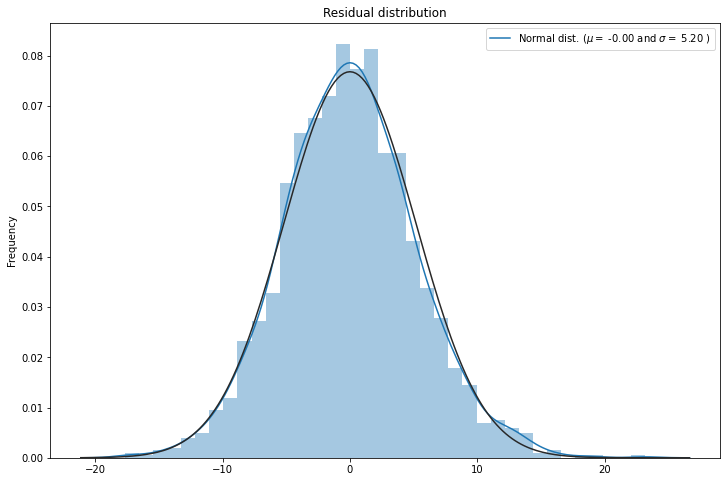

In [53]:
from scipy import stats
from scipy.stats import normaltest

resid = arima_model.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')

Now again we test the correlation 

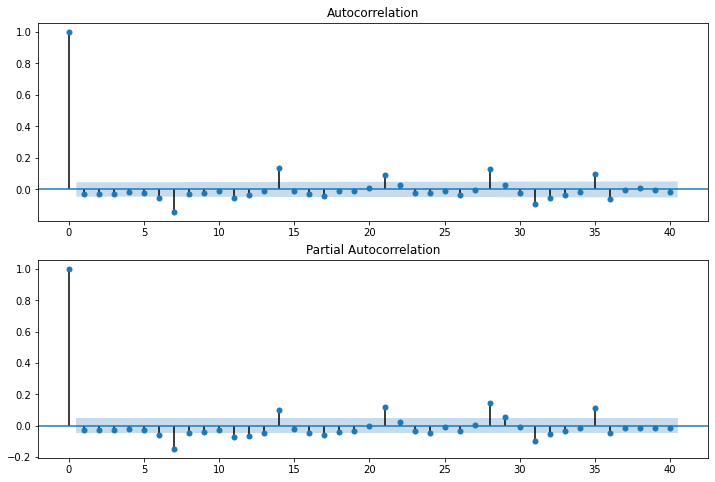

In [54]:
# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_model.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_model.resid, lags=40, ax=ax2)

We now can see a Forecast

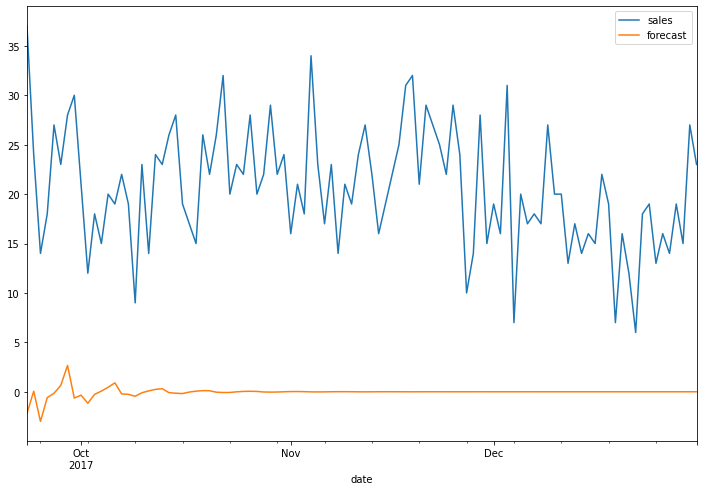

In [55]:
start_index = 1726
end_index = 1826
df1['forecast'] = arima_model.predict(start = start_index, end= end_index, dynamic= True)  
df1[start_index:end_index][['sales', 'forecast']].plot(figsize=(12, 8))

Now we train using sarima model

Now we make predictions for selective start date and end date

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


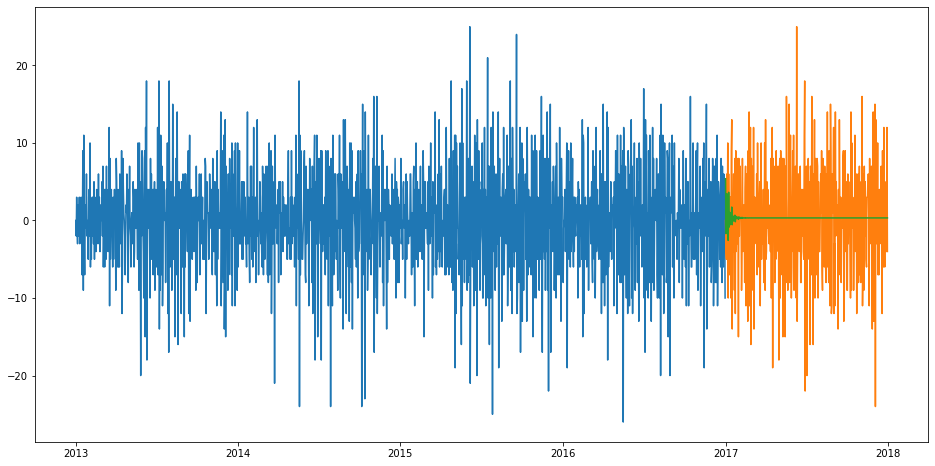

In [56]:
import statsmodels.api as sm
y_hat_avg=Valid.copy()
fit1=sm.tsa.statespace.SARIMAX(Train['sales'], order=(6,1,0)).fit()
y_hat_avg['SARIMA']=fit1.predict(start='2017-01-01',end='2017-12-31')
plt.figure(figsize=(16,8))
plt.plot(Train['sales'],label='Train')
plt.plot(Valid['sales'],label='Valid')
plt.plot(y_hat_avg['SARIMA'],label='Moving')
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error
rms5=mean_squared_error(Valid.sales,y_hat_avg.SARIMA)
print(rms5)

59.18811800997833


In [58]:
comparison = pd.DataFrame({
    "Naive":{'rmse':rms1},
    "Moving Avg":{'rmse':rms2},
    "Exponsmooth":{'rmse':rms3},
    "Holt":{'rmse':rms4},
    "SARIMA":{'rmse':rms5}})
    
comparison.head()

,Naive,Moving Avg,Exponsmooth,Holt,SARIMA
rmse,159.709589,59.553271,81.455323,60.226073,59.188118


By Looking the Comparison Table its Obivous that the data set is well fitted with SARIMA as we see that Root Mean Square Error is lower

In [62]:

test_original.index=test_original['date']
test_original.head()

,id,date,store,item,year,month,day
date,,,,,,,
2018-01-01,0,2018-01-01,1,1,2018,1,0
2018-01-02,1,2018-01-02,1,1,2018,1,1
2018-01-03,2,2018-01-03,1,1,2018,1,2
2018-01-04,3,2018-01-04,1,1,2018,1,3
2018-01-05,4,2018-01-05,1,1,2018,1,4


In [63]:
predictionmodel=test_original[['id','store']]

In [64]:
predictionmodel.head()

,id,store
date,,
2018-01-01,0,1
2018-01-02,1,1
2018-01-03,2,1
2018-01-04,3,1
2018-01-05,4,1


In [65]:
predictionmodel.tail()

,id,store
date,,
2018-03-27,44995,10
2018-03-28,44996,10
2018-03-29,44997,10
2018-03-30,44998,10
2018-03-31,44999,10


In [66]:
predict=fit1.predict(start='2018-01-01',end='2018-03-31',dynamic=True)
predictionmodel['Prediction']=predict


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [67]:
from sklearn.metrics import mean_squared_error
rms6=mean_squared_error(predictionmodel.store,predictionmodel.Prediction)
print(rms6)

34.966350055660946
